# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
import plotly.express as px

In [2]:
%matplotlib inline

In [3]:
# Set Path
path = r'C:\Users\bwink\Downloads\Data Analytics A6'

In [4]:
# Removed Coconuts from this data set as their production is far beyond every other crop
df = pd.read_csv(os.path.join(path, 'Data', 'Original Data', 'crop_yield_no97coco.csv'))

In [5]:
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Wheat,2019,Rabi,Madhya Pradesh,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423
1,Wheat,2019,Rabi,Uttar Pradesh,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533
2,Wheat,2011,Rabi,Uttar Pradesh,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333
3,Wheat,2010,Rabi,Uttar Pradesh,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222
4,Wheat,2018,Rabi,Uttar Pradesh,9855900.0,38039724,792.8,1.598627e+09,3449565.00,3.855600


In [6]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19111.000000,1.911100e+04,1.911100e+04,19111.000000,1.911100e+04,1.911100e+04,19111.000000
mean,2009.387787,1.747151e+05,7.540880e+05,1431.377530,2.373749e+07,4.710322e+04,4.369378
std,6.319378,6.361835e+05,5.648577e+06,813.891266,8.910636e+07,1.805027e+05,12.790115
min,1998.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.339500e+03,1.335500e+03,940.700000,1.821422e+05,3.431850e+02,0.597143
50%,2010.000000,8.940000e+03,1.299700e+04,1246.200000,1.180219e+06,2.322000e+03,1.021905
75%,2015.000000,7.191150e+04,1.124375e+05,1632.400000,9.745166e+06,1.910985e+04,2.336389
max,2020.000000,1.021652e+07,1.796982e+08,6552.700000,1.754789e+09,3.780111e+06,381.420000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19111 entries, 0 to 19110
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19111 non-null  object 
 1   Crop_Year        19111 non-null  int64  
 2   Season           19111 non-null  object 
 3   State            19111 non-null  object 
 4   Area             19111 non-null  float64
 5   Production       19111 non-null  int64  
 6   Annual_Rainfall  19111 non-null  float64
 7   Fertilizer       19111 non-null  float64
 8   Pesticide        19111 non-null  float64
 9   Yield            19111 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB


In [8]:
#drop categorical columns
df.drop(['Crop', 'Crop_Year', 'Season', 'State'], axis=1, inplace=True) 

In [9]:
df.head()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423
1,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533
2,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333
3,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222
4,9855900.0,38039724,792.8,1.598627e+09,3449565.00,3.855600


In [ ]:
#standardizing
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df)

## Elbow Technique

In [10]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [11]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

C:\Users\bwink\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bwink\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bwink\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bwink\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\bwink\anaconda3\Lib\site-packages\sklearn\clust

In [12]:
score

[-1.523504182900055e+20,
 -5.05435148109873e+19,
 -2.6528724446791414e+19,
 -1.5274746091780932e+19,
 -1.041618174727287e+19,
 -6.924511085494652e+18,
 -4.823681236035282e+18,
 -3.736253135798794e+18,
 -2.990304026190757e+18]

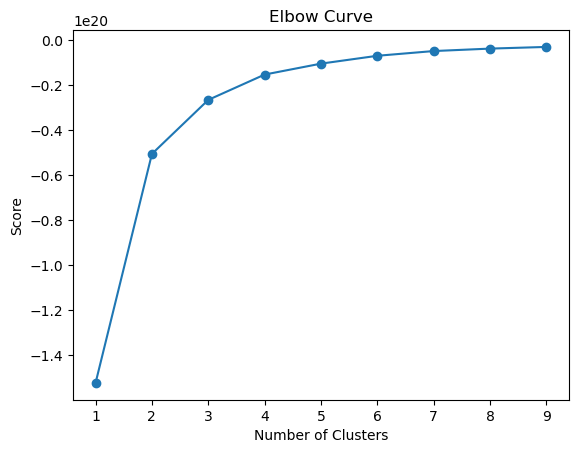

In [13]:
pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## 3 clusters is the optimal number, the curve smooths out after 3

# K means Clustering

In [15]:
kmeans = KMeans(n_clusters = 3,n_init=10) 

In [16]:
kmeans.fit(df)

KMeans(n_clusters=3, n_init=10)

In [17]:
# Create new column for clusters id
df['clusters'] = kmeans.fit_predict(df)

In [19]:
df.head()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,clusters
0,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423,2
1,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533,2
2,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333,2
3,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222,2
4,9855900.0,38039724,792.8,1.598627e+09,3449565.00,3.855600,2


In [20]:
df['clusters'].value_counts()

0    18494
1      548
2       69
Name: clusters, dtype: int64

# Visualizations

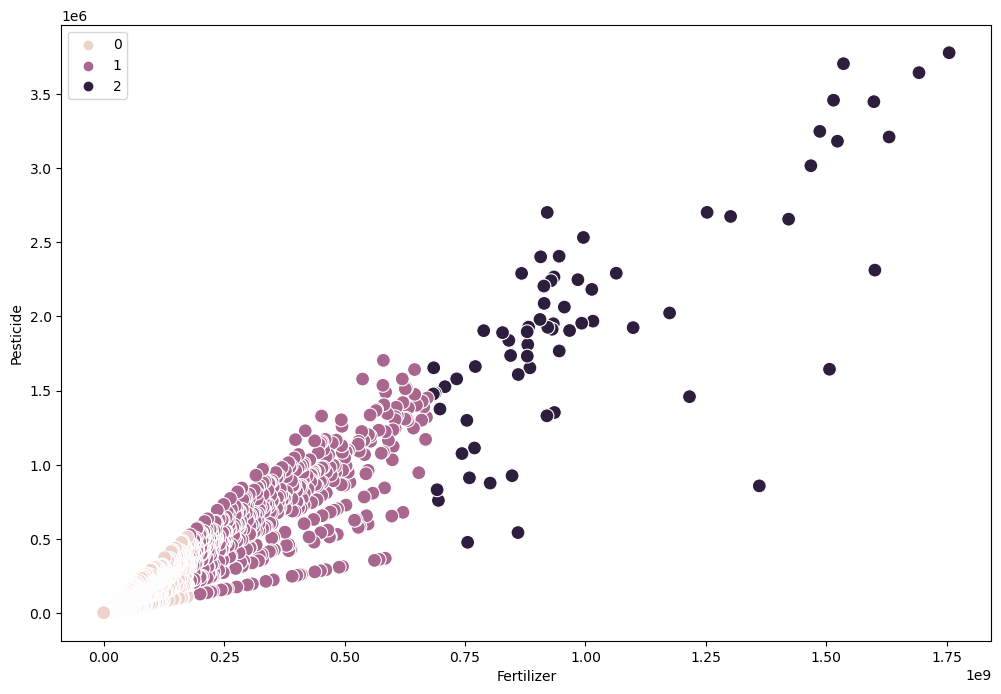

In [21]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Fertilizer'], y=df['Pesticide'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Fertilizer')
plt.ylabel('Pesticide') 
plt.show()

## the light pink, cluster 0, consists of the majority of entries. This cluster is made up of harvests where relatively little (More likely around the median amount) of Fertilizer or Pesticide is used
## cluster 1, medium purple, consists of the second most entries and covers harvests that used a small to moderate amount of both Fertilizer and Pesticide
## Note there is a density of points in cluster 1 that indicate a trend of typically using larger amounts of pesticides
## cluster 2, black, shows the fewest entries that cover harvests that used a wide range, low to high, of pesticide and moderate to high amount of fertilizer
## cluster 2 shows the majority of it's points are consistent with the trajectory of the most dense part of cluster 1
## that is to say, cluster 2 continues the trend of amount of pesticides used increasing at a quicker rate than amount of fertilizer used

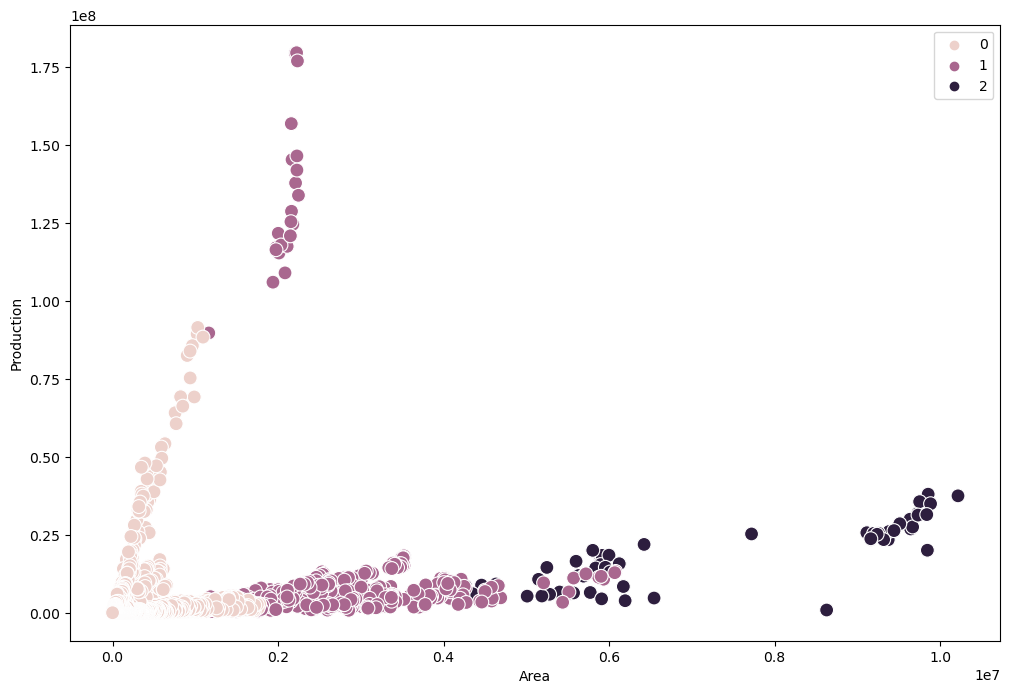

In [22]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Area'], y=df['Production'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Area')
plt.ylabel('Production') 
plt.show()

## Cluster 0 consists primarily of entries with an area between 0 and 0.2
## these entries are primarily low-production, however there are enough moderate-production values that indicate variation, this is likely due to different crops having different yields (producing less food weight per unit of area)
## cluster 1 shows the continuing trend of cluster 0. However, this is the only cluster with high-production values. Again, this may be due to certain crops having far greater yield than others
## cluster 2 interestingly enough has only low-production values. The growth in production it displays relative to area growth is minimal.

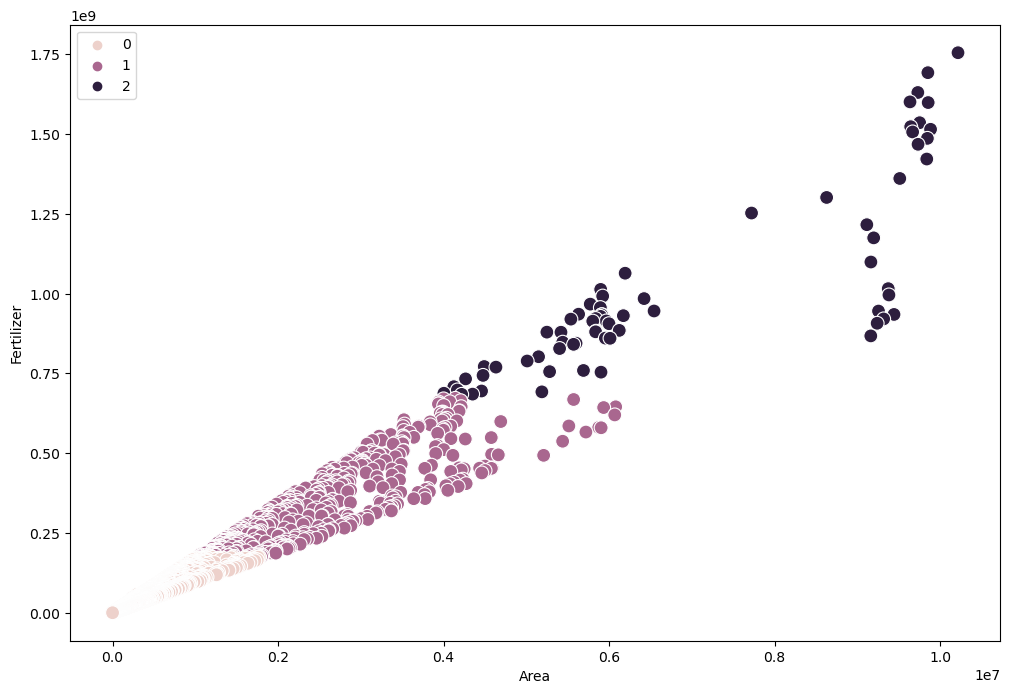

In [28]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Area'], y=df['Fertilizer'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Area')
plt.ylabel('Fertilizer') 
plt.show()

# the plot in general indicates a fairly positive linear trend between area and fertilizer use

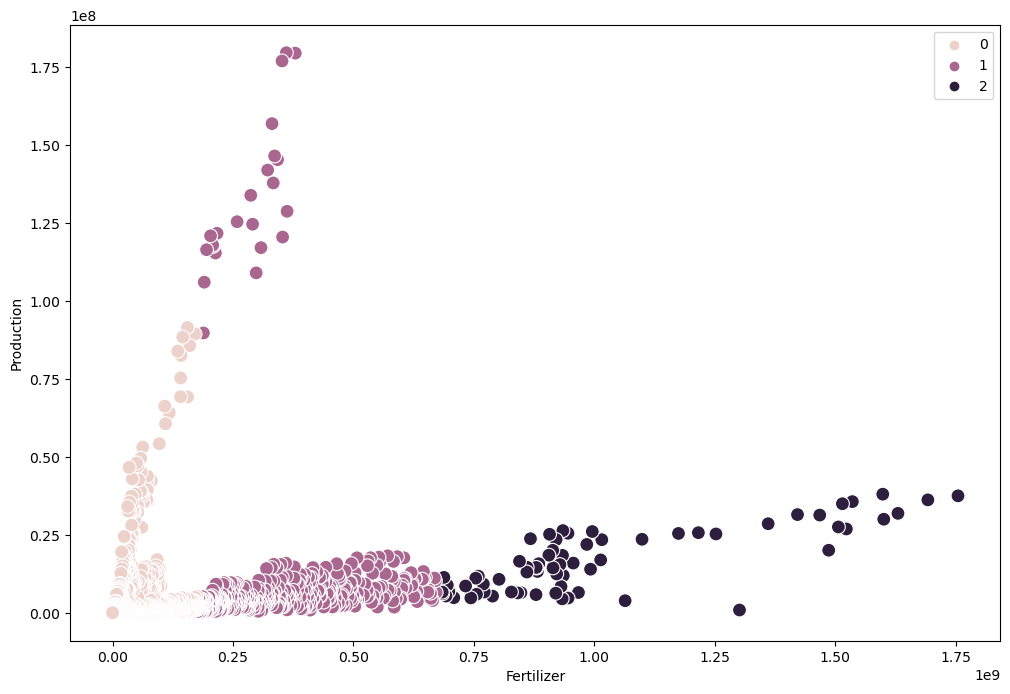

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Fertilizer'], y=df['Production'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Fertilizer')
plt.ylabel('Production') 
plt.show()

## the clusters in this plot act very similarly to the ones in the area vs production plot
## This is likely due to the linear, positive correlation between area and fertilizer
## There are clearly a few crops that thrive with far less fertilizer than other crops
## That being said, we can a clear weak positive correlation between Fertilizer and Production

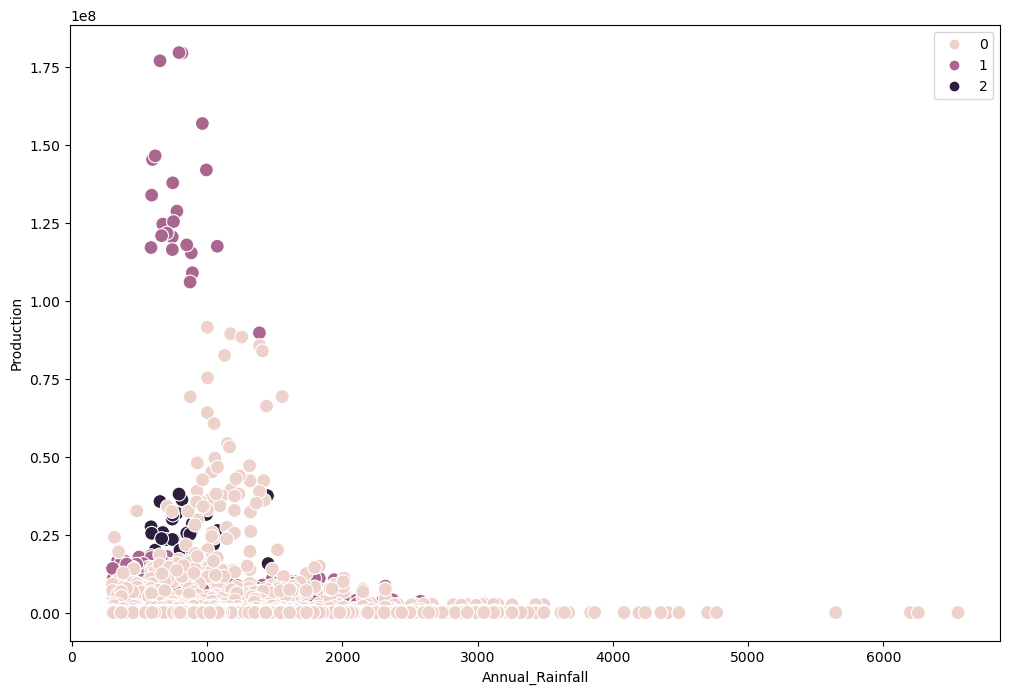

In [23]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Annual_Rainfall'], y=df['Production'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Annual_Rainfall')
plt.ylabel('Production') 
plt.show()

## This is an interesting plot
## cluster 0 covers the widest range of annual rainfall from min to max. The majority of its values are between 250 and 2000 Annual_Rainfall
## The range on production is low to moderate. This indicates, for cluster 0 at least, that there is an optimal range at which rainfall can positively affect production
## Hypothesis: Rainfall values have the greatest positive affect on production between values of 500 and 1700
## cluster 1 reinforces the hypothesis somewhat. Whle it does not have any identifiable values for rainfall above 2000, the ones we can see indicate that there is an optimal range where rainfall positively impacts production
## Cluster 1 has the highest production values, which peak between 700 and 1200 Rainfall. One can observ a steep decline in cluster 1's production value past the 1000 rainfall mark
## In fact, none of the clusters have a raised maximum production value past it's approximate rainfall value of 1000
## Cluster 2 has most its values obscured, but from what we can see it follows the same general trend as the others
## From this graph I would hypothesize that optimal yields (production per unit of area) would typically occur during years with rainfall values close to 1000

In [24]:
df.loc[df['clusters'] == 2, 'cluster'] = 'black'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [25]:
df.head()

,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,clusters,cluster
0,10216517.0,37507219,1446.7,1.754789e+09,3780111.29,3.519423,2,black
1,9852504.0,36209665,814.5,1.692266e+09,3645426.48,3.688533,2,black
2,9731150.0,31892480,777.4,1.630162e+09,3211279.50,3.253333,2,black
3,9636540.0,30000632,742.6,1.600726e+09,2312769.60,3.077222,2,black
4,9855900.0,38039724,792.8,1.598627e+09,3449565.00,3.855600,2,black


In [26]:
# Examine descriptive cluster statistics

df.groupby('cluster').agg({'Area':['mean', 'median'],
                          'Production':['mean', 'median'],
                          'Annual_Rainfall':['mean', 'median'],
                          'Fertilizer':['mean', 'median'],
                            'Pesticide':['mean', 'median'],
                             'Yield':['mean', 'median']})

Area               Production             Annual_Rainfall  \
                 mean     median          mean      median            mean   
cluster                                                                      
black    6.889249e+06  5922643.0  1.666296e+07  14537038.0      936.868050   
pink     8.069320e+04     7931.0  3.983288e+05     11100.5     1444.258353   
purple   2.502340e+06  2325037.0  1.075719e+07   4609464.5     1058.938130   

                    Fertilizer                   Pesticide              \
          median          mean        median          mean      median   
cluster                                                                  
black     874.40  1.015878e+09  9.217909e+08  1.977122e+06  1924429.29   
pink     1248.10  1.067711e+07  1.058038e+06  2.138457e+04     2092.95   
purple   1042.85  3.395786e+08  3.105037e+08  6.720473e+05   599845.56   

            Yield            
             mean    median  
cluster                      
black    2.240791  2.409200  
pink     4.375576  1.001771  
purple   4.428219  1.983533

## The most informative scatterplot, the one that measures rainfall vs production, is consistent with these stats
## The mean for rainfall for the purple cluster, the cluster with the highest production values, is consistent with my hypothesis
## There is a point in rainfall after which the positive impact begins to lessen
## There is a weak but certain positive correlation between the majority of crops in terms of production affected by area and fertilizer
